In [1]:
#imports
import sqlite3
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from get_total_movie_info import *

# General Exploration of Data

Tables to explore info on the movies

## Load tables from data sources

Loading and looking at the tables and databases overall. Here we are trying to get a general idea of what we are working 
with


In [2]:
movie_gross = pd.read_csv('../Data/bom.movie_gross.csv')
movie_gross.head()

#domestic gross hard to read due to large numbers
#make domestic_gross abreviated as 'mil'

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#list of table names
conn= sqlite3.connect("../Data/im.db")
sql_query = """
SELECT name FROM sqlite_master  
WHERE type='table'
;"""

pd.read_sql(sql_query,conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
#Person table
q = """
SELECT *
FROM persons
"""
persons_df = pd.read_sql(q, conn)

persons_df.head()
#missing data: birth and death year, primary professions
#no missing person_id or primary_name

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [5]:
#Writers table
q = """
SELECT *
FROM writers
"""
writers_df=pd.read_sql(q, conn)
writers_df.head()
writers_df.info()
#many-to-many table(associative entity)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [6]:
#directors table
q = """
SELECT *
FROM directors
"""
directors_df=pd.read_sql(q, conn)
directors_df.head()
#many-to-many table(associative entity)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [7]:
#known_for table
q = """
SELECT *
FROM known_for
"""
known_for_df=pd.read_sql(q, conn)
known_for_df.head()
#many-to-many table(associative entity)
#"this/these actor is known for many movies"

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [8]:
#principals table
q = """
SELECT *
FROM principals
"""
principals_df=pd.read_sql(q, conn)
principals_df.head()
#missing many jobs and characters
#some 'jobs' don't have character roles
#none= no values 

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [9]:
principals_df[principals_df['category']=='actor']
#dataframe where the category is equal to actor
#looking to see why the category is 'none'

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
14,tt0417610,1,nm0532721,actor,None,"[""Lucio""]"
16,tt0417610,3,nm0069209,actor,None,"[""Dr. Samaniego""]"
...,...,...,...,...,...,...
1028175,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]"
1028176,tt9689618,1,nm10439726,actor,None,None
1028177,tt9689618,2,nm10439727,actor,None,None
1028178,tt9689618,3,nm10439724,actor,None,None


In [10]:
#movi_basics table
q = """
SELECT *
FROM movie_basics
"""
movie_basics_df=pd.read_sql(q, conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
#movie_ratings table
q = """
SELECT *
FROM movie_ratings
"""
movie_ratings_df=pd.read_sql(q, conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
movie_ratings_df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
#movie_akas table
q = """
SELECT *
FROM movie_akas
"""
movie_akas_df=pd.read_sql(q, conn)
movie_akas_df.head()
#multiple of the same movie ID, same movies but in different languages and regions
#where certain movies do best

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [14]:
reviews = pd.read_table('../Data/rt.reviews.tsv', encoding = 'latin-1')
reviews.head()
#need to use latin-1 in order to get it open
#rating given out of 5(stored as string), might be best to only look at numerator 
#use natural language processing to find missing ratings 

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [15]:
tmdb_movies = pd.read_csv('../Data/tmdb.movies.csv')
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
movie_budgets = pd.read_csv('../Data/tn.movie_budgets.csv')
movie_budgets.head()
#best table
#can get gross amounts
#forgeign gross = worldwide-domestic

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Mapping Tables

### Combining tables without movie names 

Runtime to rating: movie_basics to movie_ratings

* only about half of ht movies have ratings. Brain storming ideas on how to solve potential missing ratings

In [17]:
# Joinings movie basics and movie ratings tables on IDs
df = movie_ratings_df.merge(movie_basics_df, how='inner', on='movie_id')
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


Need to filter out foreign movies

#### Looking at the movies_aka movies table to filter out regions

In [18]:
# Joinings movie basics, movie ratings, and movie_akas tables on IDs
df = movie_ratings_df.merge(movie_basics_df, how='inner', on='movie_id')
df= df.merge(movie_akas_df, how='inner', on = "movie_id")
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
0,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,1,Just Inès,None,None,original,None,1.0
1,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,2,Samo Ines,RS,None,imdbDisplay,None,0.0
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,3,Just Inès,GB,None,None,None,0.0
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",10,The Legend of Hercules,None,None,original,None,1.0
4,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",11,Hércules - A Lenda Começa,PT,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9691896,6.3,21,Out,Coming Out,2018,64.0,Documentary,4,Coming Out,None,None,original,None,1.0
261802,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",1,Code Geass: Lelouch of the Rebellion Episode III,JP,None,None,None,0.0
261803,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",2,Code Geass: Lelouch of the Rebellion Episode III,None,None,original,None,1.0
261804,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",3,Code Geass: Lelouch of the Rebellion - Glorifi...,XWW,en,imdbDisplay,None,0.0


#### Keeping only the US movies

In [19]:
#filtering out foerign movies, showing all regions(countries)
df['region'].unique()

array([None, 'RS', 'GB', 'PT', 'JP', 'AL', 'HR', 'VN', 'IT', 'GR', 'UA',
       'RO', 'US', 'CA', 'CL', 'MX', 'RU', 'TR', 'IL', 'AR', 'PE', 'FR',
       'ES', 'BR', 'PL', 'BG', 'HU', 'VE', 'SE', 'XWW', 'XEU', 'SI', 'UY',
       'FI', 'DE', 'PH', 'NO', 'DK', 'EE', 'BE', 'LT', 'CO', 'CZ', 'AT',
       'GE', 'IE', 'ZA', 'BA', 'LV', 'AU', 'LU', 'IN', 'KR', 'IR', 'NL',
       'DZ', 'CN', 'NZ', 'ID', 'MY', 'JO', 'RW', 'EG', 'CH', 'LI', 'TH',
       'BF', 'CSXX', 'SG', 'NP', 'SK', 'BD', 'PA', 'KE', 'PK', 'PS', 'HK',
       'MK', 'KZ', 'TW', 'LK', 'IS', 'MW', 'DO', 'BO', 'PY', 'SL', 'AZ',
       'AF', 'AE', 'PR', 'CU', 'NG', 'IQ', 'AM', 'CY', 'GU', 'HN', 'XAS',
       'TN', 'BY', 'SA', 'HT', 'MT', 'BH', 'KH', 'KG', 'FO', 'SV', 'XSA',
       'GT', 'LB', 'BT', 'CR', 'XKV', 'UZ', 'MA', 'ME', 'LA', 'SB', 'XKO',
       'SY', 'TZ', 'QA', 'MN', 'EC', 'JM', 'NE', 'AN', 'MV', 'TT', 'ET',
       'CF', 'CM', 'MM', 'TJ', 'SM', 'MD', 'GW', 'KW', 'AD', 'BB', 'MZ',
       'BS', 'SO', 'BZ', 'IM', 'MC', 'AW', 

region we want to filter for is US

In [20]:
us_movies = df[df['region']=='US']
us_movies

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
14,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,The Legend of Hercules,US,None,None,None,0.0
26,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",31,Untitled Hercules Project,US,None,working,None,0.0
29,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",5,Hercules: The Legend Begins,US,None,working,None,0.0
42,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",4,Hamill,US,None,festival,None,0.0
45,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",7,The Hammer,US,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261737,tt9165332,7.4,710,Chitralahari,Chitralahari,2019,131.0,Drama,2,Chitralahari,US,en,imdbDisplay,None,0.0
261760,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",1,The Car 2: Road to Revenge,US,None,working,None,0.0
261761,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",2,The Car 2,US,None,working,None,0.0
261762,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",3,The Car: Road to Revenge,US,None,None,None,0.0


Duplicate Movie IDs

In [21]:
#dropping duplicate movie_id's
us_movies= us_movies.drop_duplicates(subset=['movie_id'])
us_movies


,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
14,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,The Legend of Hercules,US,None,None,None,0.0
42,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",4,Hamill,US,None,festival,None,0.0
64,tt1161457,4.2,148,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi",1,Vanquisher,US,None,None,new title,0.0
76,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,Baggage Claim,US,None,None,None,0.0
85,tt1174693,5.8,2381,The Four-Faced Liar,The Four-Faced Liar,2010,87.0,"Comedy,Drama,Romance",5,The Four-Faced Liar,US,None,None,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261715,tt8948790,9.0,1778,Jersey,Jersey,2019,157.0,"Drama,Sport",3,Jersey,US,en,imdbDisplay,None,0.0
261734,tt9127488,9.3,10,Postal,Postal,2019,77.0,Comedy,2,Postal,US,None,None,None,0.0
261737,tt9165332,7.4,710,Chitralahari,Chitralahari,2019,131.0,Drama,2,Chitralahari,US,en,imdbDisplay,None,0.0
261760,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",1,The Car 2: Road to Revenge,US,None,working,None,0.0


No duplicate movies, shows regions as well

### Adding in gross numbers to the table

#### Clean title and year info to merge
-rules: 
1. all lower
2. only aplhanumeric
3. remove spaces
4. use primary title as title

merging on title AND year to show differnce in the movies with the same name (remakes?)

In [22]:
# use RegEx to keep only alpha-numeric values, remove spaces and make all letters lowercase 
#us_movies["title"] = us_movies["title"].map(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x).lower())
us_movies["title"] = us_movies["title"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())
movie_budgets["movie"] = movie_budgets["movie"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())
movie_gross["title"] = movie_gross["title"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())

C:\Users\hopmiller\AppData\Local\Temp\ipykernel_15012\2153799188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_movies["title"] = us_movies["title"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())


In [23]:
#splitting the release_date column into only a year

In [24]:
# get a year column as int to match the other df types
movie_budgets['year']= movie_budgets['release_date'].map(lambda x: int(x[-4:]))
movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",piratesofthecaribbeanonstrangertides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",darkphoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",avengersageofultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",starwarsepviiithelastjedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",red11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",returntothelandofwonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",aplaguesopleasant,"$1,400",$0,$0,2015


#### rename columns for merging
##### dataframes merged to get gros income across

In [25]:
#movie_budgets.rename(columns={'movie': "title", 'domestic_gross':'domestic_gross_movie_budgets',
                             #'worldwide_gross': 'worldwide_gross_movie_budgets'}, inplace =True)
#movie_gross.rename(columns={'domestic_gross': 'domestic_gross_movie_gross', 'foreign_gross': 'foreign_movie_gross'}, inplace =True)

#us_movies.rename(columns ={'start_year': 'year'}, inplace=True)

movie_budgets.rename(columns={"movie": "title", "domestic_gross": "domestic_gross_movie_budgets",
                              "worldwide_gross": "worldwide_gross_movie_budgets"}, inplace=True)

movie_gross.rename(columns={"domestic_gross": "domestic_gross_movie_gross", 
                            "foreign_gross": "foreign_gross_movie_gross"}, inplace=True)

In [26]:
#combine tables with 2 columns to distinguish different movies with same name
final_gross_df1 = us_movies.merge(movie_budgets, on="title", how="inner")
final_gross_df1

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,language,types,attributes,is_original_title,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,None,None,None,0.0,42,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319",2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,None,None,None,0.0,38,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836",2013
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,None,imdbDisplay,None,0.0,15,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835",2011
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,None,None,None,0.0,61,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",2010
4,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,...,None,None,None,0.0,61,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,tt2592614,5.6,74979,Resident Evil: The Final Chapter,Resident Evil: The Final Chapter,2016,107.0,"Action,Horror,Sci-Fi",2,residentevilthefinalchapter,...,None,None,None,0.0,84,"Jan 27, 2017","$40,000,000","$26,844,692","$314,101,190",2017
1685,tt2612800,5.7,37,Sisters,Schwestern,2013,84.0,Drama,2,sisters,...,None,imdbDisplay,None,0.0,57,"Dec 18, 2015","$30,000,000","$87,044,645","$106,030,660",2015
1686,tt2704998,7.0,163279,Game Night,Game Night,2018,100.0,"Action,Comedy,Crime",15,gamenight,...,None,imdbDisplay,None,0.0,94,"Feb 23, 2018","$37,000,000","$69,179,066","$117,378,084",2018
1687,tt3111864,5.0,102,8 Days,8 Days,2014,90.0,"Drama,Thriller",1,8days,...,None,None,None,0.0,48,"Oct 13, 2015","$2,500,000",$0,$0,2015


In [27]:
final_gross_df2=us_movies.merge(movie_gross, on='title', how='inner').drop_duplicates(subset=['movie_id'])
final_gross_df2

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,US,None,None,None,0.0,LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,US,None,None,None,0.0,FoxS,21600000.0,887000,2013
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,US,None,imdbDisplay,None,0.0,Sony,75600000.0,34600000,2011
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,US,None,None,None,0.0,WB,32700000.0,72500000,2010
4,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,US,None,None,None,0.0,WB,32700000.0,72500000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,tt2592614,5.6,74979,Resident Evil: The Final Chapter,Resident Evil: The Final Chapter,2016,107.0,"Action,Horror,Sci-Fi",2,residentevilthefinalchapter,US,None,None,None,0.0,SGem,26800000.0,285400000,2017
1563,tt2612800,5.7,37,Sisters,Schwestern,2013,84.0,Drama,2,sisters,US,None,imdbDisplay,None,0.0,Uni.,87000000.0,18000000,2015
1564,tt2704998,7.0,163279,Game Night,Game Night,2018,100.0,"Action,Comedy,Crime",15,gamenight,US,None,imdbDisplay,None,0.0,WB (NL),69200000.0,48500000,2018
1565,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",16,boyerased,US,None,imdbDisplay,None,0.0,Focus,6800000.0,5000000,2018


In [28]:
#shows all gross tables merged
final_gross_all = pd.concat([final_gross_df1, final_gross_df2]).drop_duplicates(subset=['movie_id'])
final_gross_all

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,is_original_title,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,year,studio,domestic_gross_movie_gross,foreign_gross_movie_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,0.0,42.0,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319",2014,NaN,NaN,NaN
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,0.0,38.0,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836",2013,NaN,NaN,NaN
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,0.0,15.0,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835",2011,NaN,NaN,NaN
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,0.0,61.0,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",2010,NaN,NaN,NaN
4,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,...,0.0,61.0,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",2010,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,tt2132285,5.6,77726,The Bling Ring,The Bling Ring,2013,90.0,"Biography,Crime,Drama",1,theblingring,...,0.0,NaN,NaN,NaN,NaN,NaN,2013,A24,5800000.0,13300000
1559,tt2205697,7.2,78903,Stuck in Love.,Stuck in Love.,2012,97.0,"Comedy,Drama,Romance",6,stuckinlove,...,0.0,NaN,NaN,NaN,NaN,NaN,2013,MNE,81100.0,NaN
1561,tt2463288,6.0,48134,Walk of Shame,Walk of Shame,2014,95.0,Comedy,12,walkofshame,...,0.0,NaN,NaN,NaN,NaN,NaN,2014,FCW,59200.0,NaN
1565,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",16,boyerased,...,0.0,NaN,NaN,NaN,NaN,NaN,2018,Focus,6800000.0,5000000


In [29]:
#finding length of final_gross_df1
len(final_gross_df1), final_gross_df1['movie_id'].nunique()

(1689, 1636)

In [30]:
final_gross_df1, final_gross_df1['movie_id'].nunique()

(       movie_id  averagerating  numvotes                     primary_title  \
 0     tt1043726            4.2     50352            The Legend of Hercules   
 1     tt1171222            5.1      8296                     Baggage Claim   
 2     tt1210166            7.6    326657                         Moneyball   
 3     tt1212419            6.5     87288                         Hereafter   
 4     tt6096334            6.4         5                        Here After   
 ...         ...            ...       ...                               ...   
 1684  tt2592614            5.6     74979  Resident Evil: The Final Chapter   
 1685  tt2612800            5.7        37                           Sisters   
 1686  tt2704998            7.0    163279                        Game Night   
 1687  tt3111864            5.0       102                            8 Days   
 1688  tt3125324            6.9     14122                 Beyond the Lights   
 
                         original_title  start_yea

## Investigate Rotten Tomatoes Data

Joining director and movie 

In [31]:
#Load tables
conn = sqlite3.connect("../Data/im.db")
sql_query = """
SELECT name FROM sqlite_master  
WHERE type='table';
"""
pd.read_sql(sql_query,conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [32]:
#putting director's name and movie name in one table
q = """
SELECT movie_basics.movie_id, movie_basics.primary_title, persons.primary_name
FROM directors
JOIN movie_basics on directors.movie_id = movie_basics.movie_id
JOIN persons ON directors.person_id = persons.person_id
"""
director_to_movies = pd.read_sql(q, conn).drop_duplicates(subset=['primary_name','primary_title'])
director_to_movies

,movie_id,primary_title,primary_name
0,tt0285252,Life's a Beach,Tony Vitale
1,tt0462036,Steve Phoenix: The Untold Story,Bill Haley
2,tt0835418,The Babymakers,Jay Chandrasekhar
4,tt0878654,Bulletface,Albert Pyun
5,tt0878654,Bulletface,Joe Baile
...,...,...,...
291166,tt8999974,Madre Luna,Daysi Burbano
291167,tt9001390,The woman and the river,Bernard Lessa
291168,tt9001494,Stone Mountain Georgia 08.28.18,Tate Nova
291169,tt9001494,Stone Mountain Georgia 08.28.18,Courtney Faye Powell


rt_move_info and rt_movie_reviews

In [33]:
#load rotten tomatoes
rt_movie_info = pd.read_table('../Data/rt.movie_info.tsv')
rt_movie_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Splitting the theatre_date column into just year. Done to be able to merge rt_movie_info with total_movie_info

In [34]:
#drop missing values
rt_movie_info.dropna(subset=['theater_date'],inplace=True)
#split theatre_date column
rt_movie_info['year']= rt_movie_info['theater_date'].map(lambda x: int(x[-4:]))
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,year
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1971
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,1996
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,1994
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,2000


Plan: replace person ID with direct name and movie_id with the movie name. Then we will merge RT data with the gross table data. Merge on director and release date

## Merging the rotten tomatoes table with the director movie table

##### This will allow us to match the director with the release date


The goal in this is to match the director with the movie--- hopefully each director has only released one movie on one day

In [35]:
#merging direct_to_movies with final_gross_all
total_movie_info= final_gross_all.merge(director_to_movies[['movie_id','primary_name']], on="movie_id", how="left")
total_movie_info[total_movie_info["movie_id"].duplicated(keep=False)]
#checked to make sure duplicates all had different directors

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,year,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,primary_name
4,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,...,61.0,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",2010,NaN,NaN,NaN,Esy Casey
5,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,...,61.0,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",2010,NaN,NaN,NaN,Sarah Friedland
6,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",26,21jumpstreet,...,44.0,"Mar 16, 2012","$42,000,000","$138,447,667","$202,812,429",2012,NaN,NaN,NaN,Christopher Miller
7,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",26,21jumpstreet,...,44.0,"Mar 16, 2012","$42,000,000","$138,447,667","$202,812,429",2012,NaN,NaN,NaN,Phil Lord
12,tt1460743,6.9,6990,Reign of Assassins,Jian yu,2010,117.0,"Action,Adventure",11,reignofassassins,...,28.0,"Nov 1, 2016","$14,000,000",$0,"$11,354,230",2016,NaN,NaN,NaN,John Woo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,tt2201884,8.0,5,The Workshop,The Workshop,2012,77.0,"Documentary,Family",1,theworkshop,...,NaN,NaN,NaN,NaN,NaN,2018,Strand,22100.0,NaN,Olivia Cuartero-Briggs
2562,tt8923482,7.5,103,One Child Nation,Born in China,2019,85.0,Documentary,3,borninchina,...,NaN,NaN,NaN,NaN,NaN,2017,BV,13900000.0,11200000,Nanfu Wang
2563,tt8923482,7.5,103,One Child Nation,Born in China,2019,85.0,Documentary,3,borninchina,...,NaN,NaN,NaN,NaN,NaN,2017,BV,13900000.0,11200000,Jialing Zhang
2571,tt5516328,6.4,23557,Ghost Stories,Ghost Stories,2017,98.0,"Drama,Horror",12,ghoststories,...,NaN,NaN,NaN,NaN,NaN,2018,IFC,149000.0,NaN,Jeremy Dyson


Dropped duplicates but kept movies that appeared twice. Some movies will have 2 different directors.

### Final Merged Table

Gives us income, budget, genre, date, title, director, rating

In [36]:
#Dropping NAN values
total_movie_info.dropna(subset='primary_name', inplace= True)
rt_movie_info.dropna(subset='director', inplace= True)

#### Cleaning before the merge

In [37]:
#making the primary_name uniform in im.db directors table
total_movie_info["primary_name"] = total_movie_info["primary_name"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())
#making the director names uniform in rt_movie_info table
rt_movie_info["director"] = rt_movie_info["director"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())

In [38]:
#merging total_movie_info to rt_movie_info
total_movie_info_all= total_movie_info.merge(rt_movie_info, left_on=['primary_name','year'],right_on=['director','year'], how="left")
total_movie_info

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,year,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,primary_name
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,42.0,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319",2014,NaN,NaN,NaN,rennyharlin
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,38.0,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836",2013,NaN,NaN,NaN,davidetalbert
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,15.0,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835",2011,NaN,NaN,NaN,bennettmiller
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,61.0,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",2010,NaN,NaN,NaN,clinteastwood
4,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,...,61.0,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",2010,NaN,NaN,NaN,esycasey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,tt2132285,5.6,77726,The Bling Ring,The Bling Ring,2013,90.0,"Biography,Crime,Drama",1,theblingring,...,NaN,NaN,NaN,NaN,NaN,2013,A24,5800000.0,13300000,sofiacoppola
2578,tt2205697,7.2,78903,Stuck in Love.,Stuck in Love.,2012,97.0,"Comedy,Drama,Romance",6,stuckinlove,...,NaN,NaN,NaN,NaN,NaN,2013,MNE,81100.0,NaN,joshboone
2579,tt2463288,6.0,48134,Walk of Shame,Walk of Shame,2014,95.0,Comedy,12,walkofshame,...,NaN,NaN,NaN,NaN,NaN,2014,FCW,59200.0,NaN,stevenbrill
2580,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",16,boyerased,...,NaN,NaN,NaN,NaN,NaN,2018,Focus,6800000.0,5000000,joeledgerton


In [39]:
#checking for dupicate movie_id's
total_movie_info[total_movie_info["movie_id"].duplicated(keep=False)]

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,year,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,primary_name
4,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,...,61.0,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",2010,NaN,NaN,NaN,esycasey
5,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,...,61.0,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",2010,NaN,NaN,NaN,sarahfriedland
6,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",26,21jumpstreet,...,44.0,"Mar 16, 2012","$42,000,000","$138,447,667","$202,812,429",2012,NaN,NaN,NaN,christophermiller
7,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",26,21jumpstreet,...,44.0,"Mar 16, 2012","$42,000,000","$138,447,667","$202,812,429",2012,NaN,NaN,NaN,phillord
12,tt1460743,6.9,6990,Reign of Assassins,Jian yu,2010,117.0,"Action,Adventure",11,reignofassassins,...,28.0,"Nov 1, 2016","$14,000,000",$0,"$11,354,230",2016,NaN,NaN,NaN,johnwoo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,tt2201884,8.0,5,The Workshop,The Workshop,2012,77.0,"Documentary,Family",1,theworkshop,...,NaN,NaN,NaN,NaN,NaN,2018,Strand,22100.0,NaN,oliviacuarterobriggs
2562,tt8923482,7.5,103,One Child Nation,Born in China,2019,85.0,Documentary,3,borninchina,...,NaN,NaN,NaN,NaN,NaN,2017,BV,13900000.0,11200000,nanfuwang
2563,tt8923482,7.5,103,One Child Nation,Born in China,2019,85.0,Documentary,3,borninchina,...,NaN,NaN,NaN,NaN,NaN,2017,BV,13900000.0,11200000,jialingzhang
2571,tt5516328,6.4,23557,Ghost Stories,Ghost Stories,2017,98.0,"Drama,Horror",12,ghoststories,...,NaN,NaN,NaN,NaN,NaN,2018,IFC,149000.0,NaN,jeremydyson


# Visually Exploring Trends

Importing function ot clean dataframes

In [40]:
df = get_clean_df()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Looking for relations between genres and domestic movie gross

#### Bar Chart

df_Starting off by using matplot.lib to find general trends betrween how much a movie makes in the US and what genre it falls into

KeyError: "None of [Index([   'Action,Adventure,Fantasy',                      'Comedy',\n             'Biography,Drama,Sport',       'Drama,Fantasy,Romance',\n                       'Documentary',                 'Documentary',\n               'Action,Comedy,Crime',         'Action,Comedy,Crime',\n              'Comedy,Drama,Romance',     'Fantasy,Horror,Thriller',\n       ...\n                      'Drama,Horror', 'Biography,Documentary,Sport',\n            'Biography,Comedy,Drama',             'Action,Thriller',\n                      'Comedy,Drama',       'Biography,Crime,Drama',\n              'Comedy,Drama,Romance',                      'Comedy',\n                   'Biography,Drama',             'Horror,Thriller'],\n      dtype='object', length=2579)] are in the [columns]"

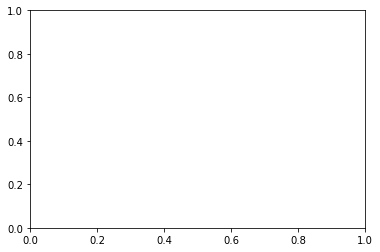

In [44]:
df.plot(x= total_movie_info['genres'], y='production_budget', kind='scatter')
#cannot get to work. Try and findout how to incorportate genres 

Graphs' x-axis is off. Numbers are in no meaningful order. Will try to plot points on a scatterplot instead to see trends

#### Scatter Plot- clean_domestic_gross to production_budget

<AxesSubplot:xlabel='clean_domestic_gross', ylabel='production_budget'>

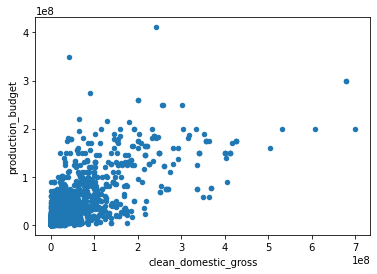

In [42]:
#need to clean data prior to putting them in graphs
df.plot(x= 'clean_domestic_gross', y='production_budget', kind='scatter')

Most movies appear to have prodction budgets under $1,000,000. The movies with higher budgets did not nessessarily mean that the domestic gross would be higher.